In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using ca

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,AreaPlantada,pHdoSolo,TemperaturadoSolo,LucroBruto
0,98.09,6.31,30.15,19171.61
1,60.95,6.12,26.90,14379.22
2,75.26,6.55,24.53,15925.05
3,100.33,5.83,25.76,18058.05
4,100.64,5.58,21.12,16777.58


In [6]:
df.tail()

,AreaPlantada,pHdoSolo,TemperaturadoSolo,LucroBruto
1495,83.53,7.47,19.65,15773.78
1496,42.78,5.56,24.86,12114.56
1497,43.07,6.17,24.71,12219.86
1498,20.46,5.31,27.41,10063.94
1499,46.21,6.18,23.39,12405.00


In [7]:
df.isna().sum()

AreaPlantada         0
pHdoSolo             0
TemperaturadoSolo    0
LucroBruto           0
dtype: int64

In [8]:
df.dtypes

AreaPlantada         float64
pHdoSolo             float64
TemperaturadoSolo    float64
LucroBruto           float64
dtype: object

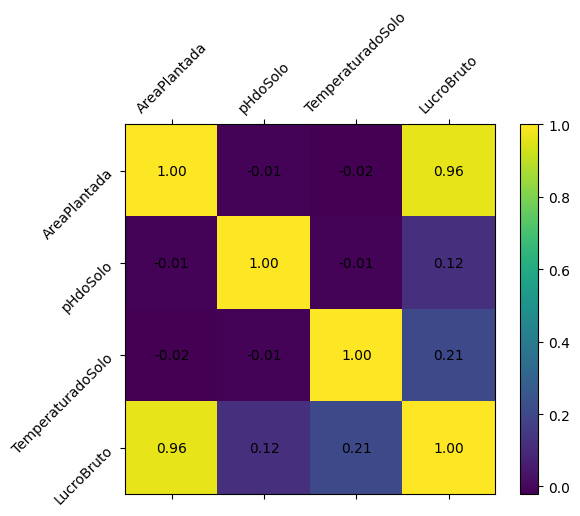

In [21]:
corr = df.corr()

fig = plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(corr, interpolation='nearest')
fig.colorbar(cax)

xaxis = range(len(df.columns))

plt.yticks(rotation=45)
plt.xticks(rotation=45)

ax.set_xticks(xaxis)
ax.set_yticks(xaxis)

ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        ax.text(i, j, f'{corr.iloc[i, j]:.2f}', va='center', ha='center', color='black')

plt.show()

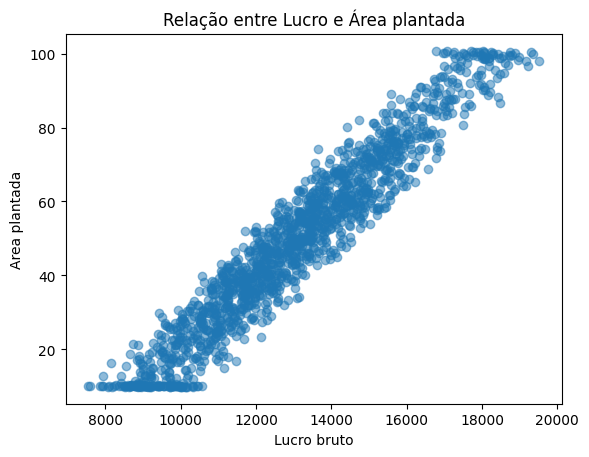

In [26]:
plt.title('Relação entre Lucro e Área plantada')
plt.scatter(df['LucroBruto'], df['AreaPlantada'], alpha=0.5)
plt.xlabel('Lucro bruto')
plt.ylabel('Area plantada')
plt.show()

In [27]:
df.describe()

,AreaPlantada,pHdoSolo,TemperaturadoSolo,LucroBruto
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,49.079253,6.244113,24.820660,12999.655180
std,24.013854,0.680982,2.869122,2482.413721
min,9.880000,4.900000,19.550000,7545.520000
25%,30.800000,5.717500,22.697500,11127.322500
50%,48.405000,6.250000,24.780000,12950.555000
75%,65.797500,6.750000,27.020000,14751.250000
max,100.700000,7.620000,30.720000,19517.020000


Text(0.5, 1.0, 'Area Plantada')

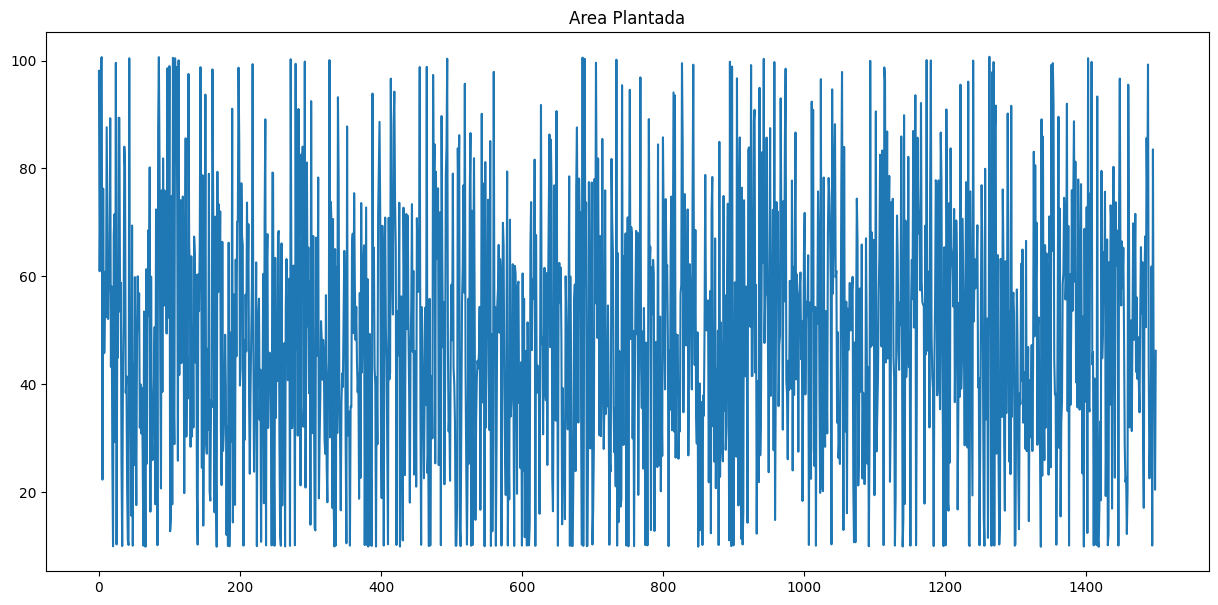

In [28]:
df['AreaPlantada'].plot(figsize=(15, 7))
plt.title('Area Plantada')

<Axes: >

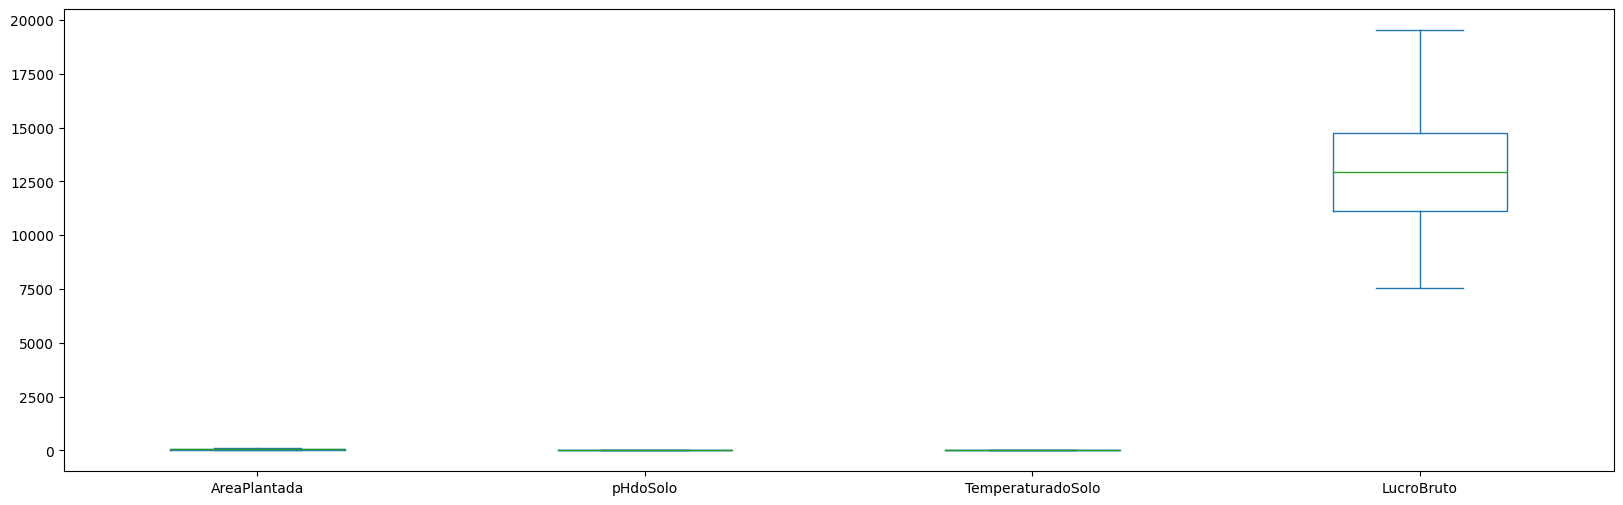

In [29]:
df.plot.box(figsize=(20, 6))

array([[<Axes: title={'center': 'AreaPlantada'}>,
        <Axes: title={'center': 'LucroBruto'}>],
       [<Axes: title={'center': 'TemperaturadoSolo'}>,
        <Axes: title={'center': 'pHdoSolo'}>]], dtype=object)

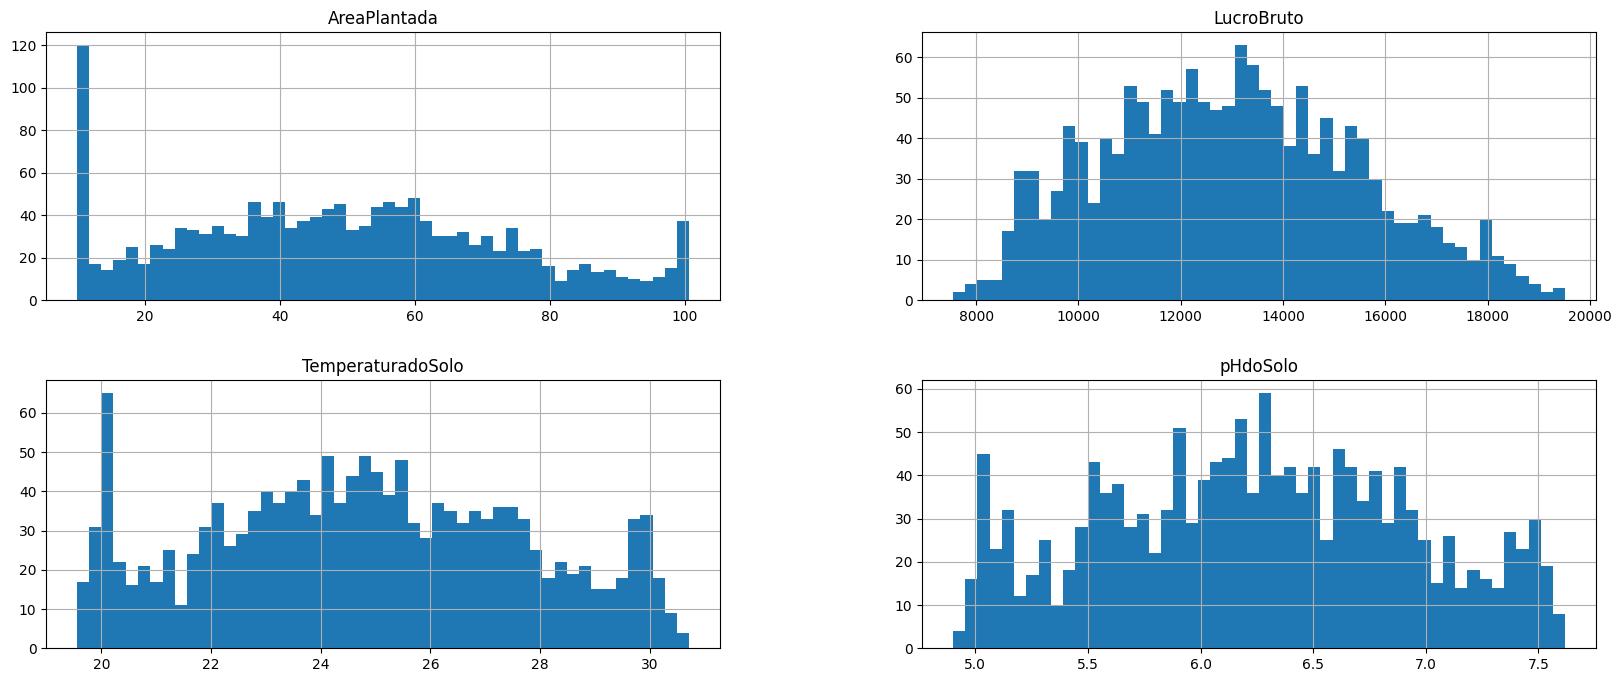

In [34]:
[['AreaPlantada', 'LucroBruto', 'TemperaturadoSolo', 'pHdoSolo']].hist(figsize=(20, 8), bins=50)

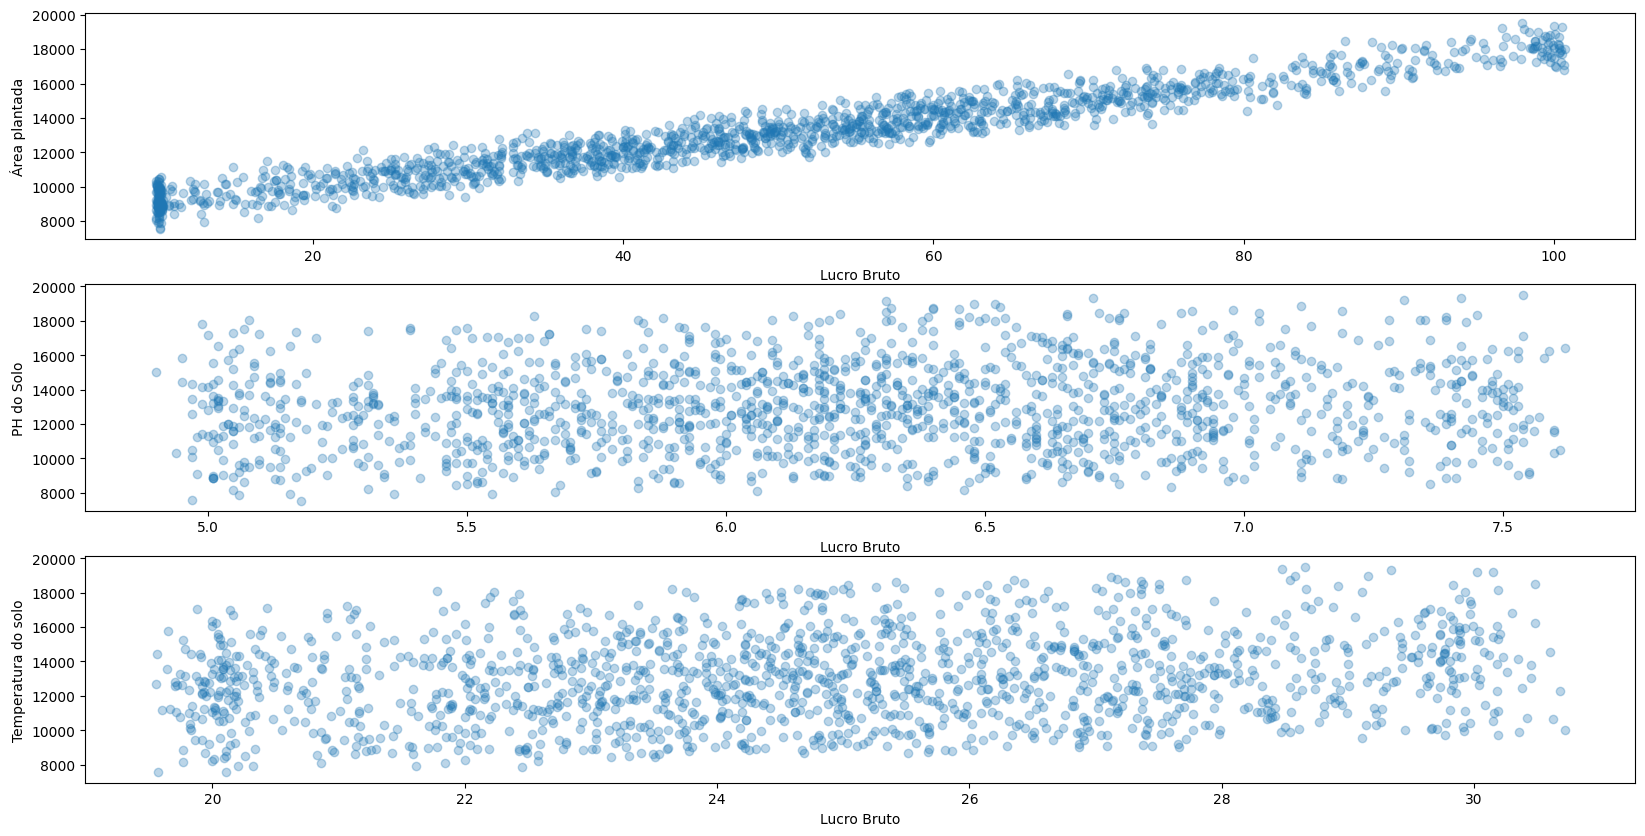

In [56]:
fig,ax = plt.subplots(3, figsize=(20, 10))

ax[0].scatter(df['AreaPlantada'], df['LucroBruto'], alpha=0.3)
ax[0].set(ylabel='Área plantada', xlabel='Lucro Bruto')
ax[1].scatter(df['pHdoSolo'], df['LucroBruto'], alpha=0.3)
ax[1].set(ylabel='PH do Solo', xlabel='Lucro Bruto')
ax[2].scatter(df['TemperaturadoSolo'], df['LucroBruto'], alpha=0.3)
ax[2].set(ylabel='Temperatura do solo', xlabel='Lucro Bruto')

plt.show()

In [57]:
X = df.drop(['LucroBruto'], axis=1)
y = df['LucroBruto']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
model = LinearRegression()

model = model.fit(X_train, y_train)


In [67]:
y_pred = model.predict(X_test)

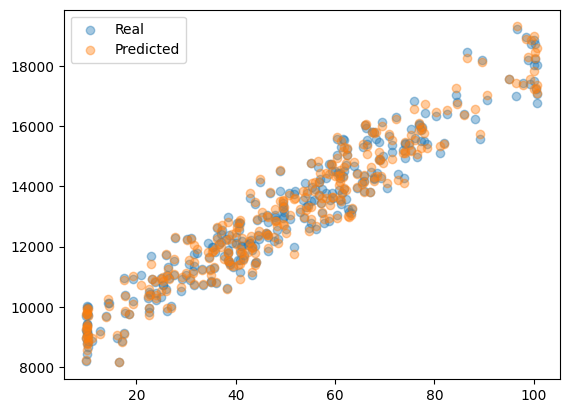

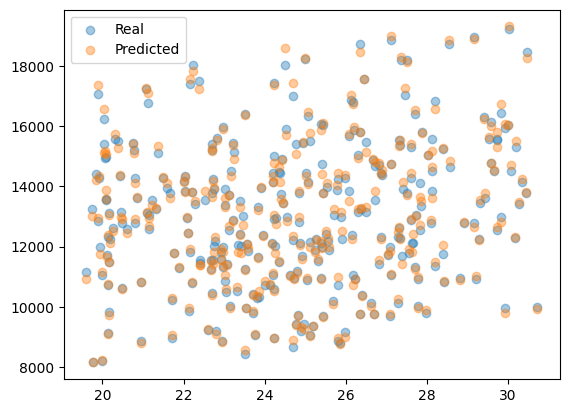

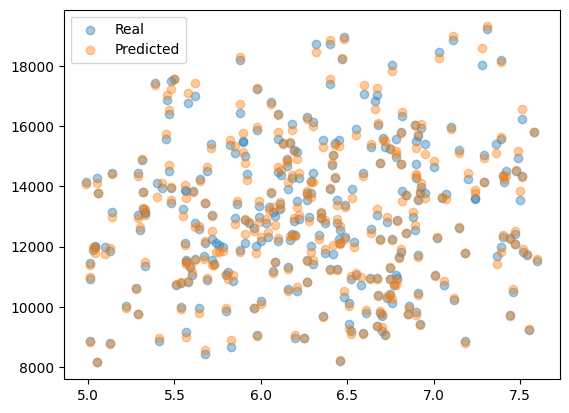

In [74]:
plt.scatter(X_test['AreaPlantada'], y_test, alpha=0.4, label='Real')
plt.scatter(X_test['AreaPlantada'], y_pred, alpha=0.4, label='Predicted')
plt.legend()
plt.show()

plt.scatter(X_test['TemperaturadoSolo'], y_test, alpha=0.4, label='Real')
plt.scatter(X_test['TemperaturadoSolo'], y_pred, alpha=0.4, label='Predicted')
plt.legend()
plt.show()

plt.scatter(X_test['pHdoSolo'], y_test, alpha=0.4, label='Real')
plt.scatter(X_test['pHdoSolo'], y_pred, alpha=0.4, label='Predicted')
plt.legend()
plt.show()